In [1]:
from dask.distributed import Client, LocalCluster

# Connect to an existing LocalCluster if available
# The default port is 8786
try:
    # This creates a new Client connection to an existing Dask scheduler if one exists.
    # There is no practical way to get the LocalCluster object from the existing scheduler,
    # although the scheduler details can be accessed with `client.scheduler`.
    # The LocalCluster object is only available from the notebook that created it.
    # Restart the kernel or `client.close();cluster.close()` in each notebook that
    # created one to remove existing LocalClusters.
    client = Client(f'localhost:8786', timeout='2s')
    cluster = client.cluster  # None
except:
    cluster = LocalCluster(scheduler_port=8786)
    client = Client(cluster)

display(cluster if cluster else client)

In [2]:
# Initiliaze the Gateway client
from dask.distributed import Client
from dask_gateway import Gateway

gateway = Gateway()
gateway.cluster_options()

In [3]:
clusters = gateway.list_clusters()
if not clusters:
    print('Creating new cluster. Please wait for this to finish.')
    cluster = gateway.new_cluster()
else:
    print(f'An existing cluster was found. Connecting to: {clusters[0].name}')
    cluster=gateway.connect(clusters[0].name)
display(cluster)

An existing cluster was found. Connecting to: easihub.bb5d415c16cc4f56842a95cfb3eb6b3b


In [4]:
min_number_of_workers = 1
max_number_of_workers = 2

# Static scaling
cluster.scale(min_number_of_workers)

# Adaptive scaling
cluster.adapt(minimum=min_number_of_workers, maximum=max_number_of_workers)

In [5]:
client = cluster.get_client()
client.wait_for_workers(n_workers=min_number_of_workers)
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: https://hub.csiro.easi-eo.solutions/services/dask-gateway/clusters/easihub.bb5d415c16cc4f56842a95cfb3eb6b3b/status,


In [6]:
# import pandas
import pandas as pd

# read the dataset
data = pd.read_csv("metdom_water.csv") 

data

/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,sample.type,location.id,sampling.type,Stream_Order,Country,General_Vegetation,Hydrogeomorphology,River_Gradient,Intermittent_or_Perennial,...,C9H18O3NS2P,C9H18O5,C9H19O5NS,C9H19O8P,C9H20O6N4S,C9H21O8S2P,C9H22O7N4,C9H22O9N4S,C9H24O7N4,C9H5O10N2S2P
0,SW_S19S.0003_U_1,2,3,2,7,1,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
1,SW_S19S.0003_U_2,2,3,2,7,1,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,SW_S19S.0003_U_3,2,3,2,7,1,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
3,SW_S19S.0004_U_1,2,3,2,6,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
4,SW_S19S.0004_U_2,2,3,2,6,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,SW_S19S.0099_U_1,2,3,2,7,2,6,1,1,3,...,0,0,0,0,0,0,0,0,0,0
261,SW_S19S.0099_U_2,2,3,2,7,2,6,1,1,3,...,0,0,0,0,0,0,0,0,0,0
262,SW_S19S.0099_U_3,2,3,2,7,2,6,1,1,3,...,0,0,0,0,0,0,0,0,0,0
263,SW_S19S.0100_U_1,2,3,2,2,2,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# apply standard scalar to interval data to standardise them
# because the interval data was measured in different units (eg degC, m, mg/L, etc)
# leave all nominal data (prev converted from categorical data) as it is.
# leave binaries as it is because these are the targets

import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaled_features = data.copy()

col_names = [
    "Distance_DS.and.MS_meters",
    "Distance_MS.and.US_meters",
    "Primary.Sources.Flow.Variation",
    "Water.Column.Height_cm",
    "Approx.Distance.From.Gauge_meters",
    "resprate_mg.L.h",
    "resp.inc.time.min",
    "NPOC_mg.L.asC",
    "del2H_permil",
    "del18O_permil",
    "Cl_mgL",
    "SO4_mgL",
    "NO3_mgL",
    "NO2_mgL",
    "F_mgL",
    "pH",
    "DO_perc.sat",
    "DO_mg.per.L",
]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

# https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set

In [8]:
scaled_features[col_names] = features
print(scaled_features)

                   ID  sample.type  location.id  sampling.type  Stream_Order  \
0    SW_S19S.0003_U_1            2            3              2             7   
1    SW_S19S.0003_U_2            2            3              2             7   
2    SW_S19S.0003_U_3            2            3              2             7   
3    SW_S19S.0004_U_1            2            3              2             6   
4    SW_S19S.0004_U_2            2            3              2             6   
..                ...          ...          ...            ...           ...   
260  SW_S19S.0099_U_1            2            3              2             7   
261  SW_S19S.0099_U_2            2            3              2             7   
262  SW_S19S.0099_U_3            2            3              2             7   
263  SW_S19S.0100_U_1            2            3              2             2   
264  SW_S19S.0100_U_3            2            3              2             2   

     Country  General_Vegetation  Hydro

In [9]:
scaled_features

,ID,sample.type,location.id,sampling.type,Stream_Order,Country,General_Vegetation,Hydrogeomorphology,River_Gradient,Intermittent_or_Perennial,...,C9H18O3NS2P,C9H18O5,C9H19O5NS,C9H19O8P,C9H20O6N4S,C9H21O8S2P,C9H22O7N4,C9H22O9N4S,C9H24O7N4,C9H5O10N2S2P
0,SW_S19S.0003_U_1,2,3,2,7,1,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
1,SW_S19S.0003_U_2,2,3,2,7,1,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,SW_S19S.0003_U_3,2,3,2,7,1,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
3,SW_S19S.0004_U_1,2,3,2,6,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
4,SW_S19S.0004_U_2,2,3,2,6,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,SW_S19S.0099_U_1,2,3,2,7,2,6,1,1,3,...,0,0,0,0,0,0,0,0,0,0
261,SW_S19S.0099_U_2,2,3,2,7,2,6,1,1,3,...,0,0,0,0,0,0,0,0,0,0
262,SW_S19S.0099_U_3,2,3,2,7,2,6,1,1,3,...,0,0,0,0,0,0,0,0,0,0
263,SW_S19S.0100_U_1,2,3,2,2,2,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# export the scaled data for future use

scaled_features.to_csv("metdom_water_scaled.csv")

In [11]:
"deactivate once done - double ## hash key"
# split train test data 80/20 ratio
from sklearn.model_selection import train_test_split

train, test = train_test_split(scaled_features, test_size=0.20, random_state=42)
train

,ID,sample.type,location.id,sampling.type,Stream_Order,Country,General_Vegetation,Hydrogeomorphology,River_Gradient,Intermittent_or_Perennial,...,C9H18O3NS2P,C9H18O5,C9H19O5NS,C9H19O8P,C9H20O6N4S,C9H21O8S2P,C9H22O7N4,C9H22O9N4S,C9H24O7N4,C9H5O10N2S2P
172,SW_S19S.0065_U_2,2,3,2,5,2,15,1,1,1,...,0,0,0,0,0,0,0,0,0,0
232,SW_S19S.0086_U_2,2,3,2,3,2,3,1,2,1,...,0,0,0,0,0,0,0,0,0,0
18,SW_S19S.0009_U_1,2,3,2,6,2,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
90,SW_S19S.0036_U_1,2,3,2,8,2,8,2,1,1,...,0,0,0,0,0,0,0,0,0,0
182,SW_S19S.0069_U_1,2,3,2,1,2,13,2,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,SW_S19S.0010_U_1,2,3,2,7,2,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
188,SW_S19S.0071_U_1,2,3,2,1,2,10,1,2,3,...,0,0,0,0,0,0,0,0,0,0
71,SW_S19S.0028_U_3,2,3,2,4,2,3,3,2,3,...,0,0,0,0,0,0,0,0,0,0
106,SW_S19S.0042_U_1,2,3,2,1,2,7,3,1,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
"deactivate once done - double ## hash key"
# export the training and test data in csv

train.to_csv("train_metdom_water.csv", index=False)
test.to_csv("test_metdom_water.csv", index=False)

In [13]:
X_train = train[
    [
        "sample.type",
        "location.id",
        "sampling.type",
        "Stream_Order",
        "Country",
        "General_Vegetation",
        "Hydrogeomorphology",
        "River_Gradient",
        "Intermittent_or_Perennial",
        "Sediment_Bedrock",
        "Distance_DS.and.MS_meters",
        "Distance_MS.and.US_meters",
        "Primary.Sources.Flow.Variation",
        "Algal.Mat.Coverage",
        "Depositional.Type",
        "Macrophyte.Coverage",
        "Sunlight.Access_Perc.Canopy.Cover",
        "Water.Column.Height_cm",
        "Approx.Distance.From.Gauge_meters",
        "US.or.DS.of.Gauge",
        "Precipitation.Within.Week",
        "Number.Days.Since.Precip",
        "Dam.Upstream.Site",
        "Contamination.Source.Upstream",
        "Contamination.Source",
        "resprate_mg.L.h",
        "resp.inc.time.min",
        "NPOC_mg.L.asC",
        "del2H_permil",
        "del18O_permil",
        "Cl_mgL",
        "SO4_mgL",
        "NO3_mgL",
        "NO2_mgL",
        "F_mgL",
        "pH",
        "DO_perc.sat",
        "DO_mg.per.L",
    ]
].astype(float)
X_train

,sample.type,location.id,sampling.type,Stream_Order,Country,General_Vegetation,Hydrogeomorphology,River_Gradient,Intermittent_or_Perennial,Sediment_Bedrock,...,del2H_permil,del18O_permil,Cl_mgL,SO4_mgL,NO3_mgL,NO2_mgL,F_mgL,pH,DO_perc.sat,DO_mg.per.L
172,2.0,3.0,2.0,5.0,2.0,15.0,1.0,1.0,1.0,3.0,...,0.215499,0.240820,-0.171978,-0.250675,-0.390051,-0.138119,-0.283189,-3.133515,-0.958082,-0.884796
232,2.0,3.0,2.0,3.0,2.0,3.0,1.0,2.0,1.0,3.0,...,1.362769,1.662271,-0.155010,0.771271,-0.390051,-0.138119,-0.027934,1.649329,-0.958082,-0.884796
18,2.0,3.0,2.0,6.0,2.0,3.0,1.0,1.0,1.0,2.0,...,-1.559821,-1.448896,-0.165004,1.954282,-0.390051,-0.138119,0.546391,1.649329,-0.958082,-0.884796
90,2.0,3.0,2.0,8.0,2.0,8.0,2.0,1.0,1.0,3.0,...,-1.636910,-1.515091,-0.177313,-0.232943,-0.307082,-0.138119,-0.091747,0.055048,-0.958082,-0.884796
182,2.0,3.0,2.0,1.0,2.0,13.0,2.0,2.0,1.0,3.0,...,0.521589,0.467277,-0.144028,-0.260575,-0.390051,-0.138119,-0.219375,-0.742093,-0.958082,-0.884796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,2.0,3.0,2.0,7.0,2.0,5.0,1.0,1.0,1.0,2.0,...,1.036273,0.982901,-0.163754,-0.211665,-0.311392,-0.138119,-0.091747,-0.423237,-0.958082,-0.884796
188,2.0,3.0,2.0,1.0,2.0,10.0,1.0,2.0,3.0,3.0,...,-1.412445,-1.421024,-0.181920,-0.357214,-0.390051,-0.138119,-0.219375,0.055048,-0.958082,-0.884796
71,2.0,3.0,2.0,4.0,2.0,3.0,3.0,2.0,3.0,1.0,...,-0.004432,0.017847,-0.155036,-0.210335,-0.390051,-0.138119,2.843691,0.852189,-0.958082,-0.884796
106,2.0,3.0,2.0,1.0,2.0,7.0,3.0,1.0,1.0,2.0,...,1.528284,1.613496,4.290816,2.679072,-0.344795,-0.138119,-0.666072,0.852189,0.090352,0.030094


In [14]:
# drop target columns

y_train = train.drop(
    axis=0,
    columns=[
        "ID",
        "sample.type",
        "location.id",
        "sampling.type",
        "Stream_Order",
        "Country",
        "General_Vegetation",
        "Hydrogeomorphology",
        "River_Gradient",
        "Intermittent_or_Perennial",
        "Sediment_Bedrock",
        "Distance_DS.and.MS_meters",
        "Distance_MS.and.US_meters",
        "Primary.Sources.Flow.Variation",
        "Algal.Mat.Coverage",
        "Depositional.Type",
        "Macrophyte.Coverage",
        "Sunlight.Access_Perc.Canopy.Cover",
        "Water.Column.Height_cm",
        "Approx.Distance.From.Gauge_meters",
        "US.or.DS.of.Gauge",
        "Precipitation.Within.Week",
        "Number.Days.Since.Precip",
        "Dam.Upstream.Site",
        "Contamination.Source.Upstream",
        "Contamination.Source",
        "resprate_mg.L.h",
        "resp.inc.time.min",
        "NPOC_mg.L.asC",
        "del2H_permil",
        "del18O_permil",
        "Cl_mgL",
        "SO4_mgL",
        "NO3_mgL",
        "NO2_mgL",
        "F_mgL",
        "pH",
        "Temp_degC",
        "DO_perc.sat",
        "DO_mg.per.L",
    ],
).astype(int)

y_train

,C10H10O5,C10H10O5N2,C10H10O5S,C10H10O6,C10H10O6N2,C10H10O6S,C10H10O7,C10H10O7S,C10H10O8,C10H10O8S,...,C9H18O3NS2P,C9H18O5,C9H19O5NS,C9H19O8P,C9H20O6N4S,C9H21O8S2P,C9H22O7N4,C9H22O9N4S,C9H24O7N4,C9H5O10N2S2P
172,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
232,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
90,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
182,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,1,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
188,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,1,0,0,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y_train.dtypes

C10H10O5        int64
C10H10O5N2      int64
C10H10O5S       int64
C10H10O6        int64
C10H10O6N2      int64
                ...  
C9H21O8S2P      int64
C9H22O7N4       int64
C9H22O9N4S      int64
C9H24O7N4       int64
C9H5O10N2S2P    int64
Length: 6879, dtype: object

In [16]:
# from skmultilearn.problem_transform import BinaryRelevance
import time
import joblib

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

start = time.time()
classifier = RandomForestClassifier()

"""classifier = BinaryRelevance(
    classifier = RandomForestClassifier(),
    require_dense = [False, True] 
)"""

# running computation with dask https://www.codegrepper.com/code-examples/python/dask-ml+random+forest
with joblib.parallel_backend('dask'):
    rf_fitted = classifier.fit(X_train, y_train)
    
# scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)


print("training time taken: ", round(time.time() - start, 0), "seconds")
#print("CV accuracy scores: %s" % scores)
#print("CV accuracy:%.3f +/- %.3f" % (np.mean(scores), np.std(scores)))

distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


training time taken:  34.0 seconds


In [17]:
# prepare the test set for model evalution

In [18]:
X_test = test[
    [
        "sample.type",
        "location.id",
        "sampling.type",
        "Stream_Order",
        "Country",
        "General_Vegetation",
        "Hydrogeomorphology",
        "River_Gradient",
        "Intermittent_or_Perennial",
        "Sediment_Bedrock",
        "Distance_DS.and.MS_meters",
        "Distance_MS.and.US_meters",
        "Primary.Sources.Flow.Variation",
        "Algal.Mat.Coverage",
        "Depositional.Type",
        "Macrophyte.Coverage",
        "Sunlight.Access_Perc.Canopy.Cover",
        "Water.Column.Height_cm",
        "Approx.Distance.From.Gauge_meters",
        "US.or.DS.of.Gauge",
        "Precipitation.Within.Week",
        "Number.Days.Since.Precip",
        "Dam.Upstream.Site",
        "Contamination.Source.Upstream",
        "Contamination.Source",
        "resprate_mg.L.h",
        "resp.inc.time.min",
        "NPOC_mg.L.asC",
        "del2H_permil",
        "del18O_permil",
        "Cl_mgL",
        "SO4_mgL",
        "NO3_mgL",
        "NO2_mgL",
        "F_mgL",
        "pH",
        "DO_perc.sat",
        "DO_mg.per.L",
    ]
].astype(float)
X_test

,sample.type,location.id,sampling.type,Stream_Order,Country,General_Vegetation,Hydrogeomorphology,River_Gradient,Intermittent_or_Perennial,Sediment_Bedrock,...,del2H_permil,del18O_permil,Cl_mgL,SO4_mgL,NO3_mgL,NO2_mgL,F_mgL,pH,DO_perc.sat,DO_mg.per.L
179,2.0,3.0,2.0,3.0,2.0,13.0,3.0,2.0,3.0,3.0,...,-0.317324,-0.403711,-0.174399,-0.403021,-0.388974,-0.138119,-0.602258,-1.539234,-0.958082,-0.884796
115,2.0,3.0,2.0,0.0,3.0,6.0,2.0,1.0,1.0,1.0,...,0.006905,0.073590,0.068517,1.381838,3.121598,1.621571,-0.027934,1.171045,0.677560,-0.884796
96,2.0,3.0,2.0,2.0,2.0,8.0,2.0,1.0,1.0,3.0,...,0.353806,0.207722,-0.150534,-0.146648,1.595825,-0.138119,-0.474631,-0.742093,1.072591,1.137345
24,2.0,3.0,2.0,5.0,2.0,7.0,2.0,1.0,1.0,2.0,...,0.873025,0.737283,-0.175075,-0.367410,-0.082957,-0.138119,-0.347003,-0.423237,-0.958082,-0.884796
9,2.0,3.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,3.0,...,1.362769,1.662271,0.627063,0.082388,0.289866,-0.138119,-0.666072,0.852189,-0.958082,-0.884796
139,2.0,3.0,2.0,5.0,2.0,9.0,1.0,1.0,1.0,2.0,...,0.718847,0.735541,-0.134216,-0.307565,-0.390051,-0.138119,-0.283189,-0.423237,0.557983,0.288139
255,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,2.0,...,1.362769,1.662271,-0.150898,-0.203686,-0.289842,-0.138119,-0.219375,2.430527,1.732399,-0.884796
45,2.0,3.0,2.0,1.0,2.0,8.0,2.0,1.0,1.0,3.0,...,0.557866,0.416759,-0.181009,-0.388836,-0.378199,-0.138119,-0.474631,1.649329,1.644852,1.803572
185,2.0,3.0,2.0,1.0,2.0,15.0,2.0,2.0,1.0,3.0,...,0.476242,0.406307,-0.128907,-0.309338,-0.390051,-0.138119,-0.410817,-0.742093,-0.958082,-0.884796
125,2.0,3.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,3.0,...,1.061214,0.925416,-0.166123,-0.341699,-0.335098,-0.138119,-0.410817,0.852189,0.942337,0.804231


In [19]:
# drop target columns

y_test = test.drop(
    axis=0,
    columns=[
        "ID",
        "sample.type",
        "location.id",
        "sampling.type",
        "Stream_Order",
        "Country",
        "General_Vegetation",
        "Hydrogeomorphology",
        "River_Gradient",
        "Intermittent_or_Perennial",
        "Sediment_Bedrock",
        "Distance_DS.and.MS_meters",
        "Distance_MS.and.US_meters",
        "Primary.Sources.Flow.Variation",
        "Algal.Mat.Coverage",
        "Depositional.Type",
        "Macrophyte.Coverage",
        "Sunlight.Access_Perc.Canopy.Cover",
        "Water.Column.Height_cm",
        "Approx.Distance.From.Gauge_meters",
        "US.or.DS.of.Gauge",
        "Precipitation.Within.Week",
        "Number.Days.Since.Precip",
        "Dam.Upstream.Site",
        "Contamination.Source.Upstream",
        "Contamination.Source",
        "resprate_mg.L.h",
        "resp.inc.time.min",
        "NPOC_mg.L.asC",
        "del2H_permil",
        "del18O_permil",
        "Cl_mgL",
        "SO4_mgL",
        "NO3_mgL",
        "NO2_mgL",
        "F_mgL",
        "pH",
        "Temp_degC",
        "DO_perc.sat",
        "DO_mg.per.L",
    ],
).astype(int)

y_test

,C10H10O5,C10H10O5N2,C10H10O5S,C10H10O6,C10H10O6N2,C10H10O6S,C10H10O7,C10H10O7S,C10H10O8,C10H10O8S,...,C9H18O3NS2P,C9H18O5,C9H19O5NS,C9H19O8P,C9H20O6N4S,C9H21O8S2P,C9H22O7N4,C9H22O9N4S,C9H24O7N4,C9H5O10N2S2P
179,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
115,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,1,1,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,1,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
139,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
255,1,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test_pred = classifier.predict(X_test)

test_pred

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [21]:
imp1 = pd.Series(rf_fitted.feature_importances_, index=X_train.columns).nlargest(35)

imp1

NPOC_mg.L.asC                        0.126235
Cl_mgL                               0.109430
SO4_mgL                              0.107213
NO3_mgL                              0.082063
F_mgL                                0.062756
del18O_permil                        0.040842
Distance_DS.and.MS_meters            0.039654
del2H_permil                         0.039392
Approx.Distance.From.Gauge_meters    0.035194
Stream_Order                         0.033076
Distance_MS.and.US_meters            0.032430
General_Vegetation                   0.029208
pH                                   0.027341
DO_mg.per.L                          0.025111
DO_perc.sat                          0.025011
River_Gradient                       0.024010
Primary.Sources.Flow.Variation       0.019016
Number.Days.Since.Precip             0.018668
Sediment_Bedrock                     0.017019
Contamination.Source                 0.016267
Hydrogeomorphology                   0.013896
US.or.DS.of.Gauge                 

In [22]:
imp = pd.Series(rf_fitted.feature_importances_, index=X_train.columns).nlargest(25)

imp

NPOC_mg.L.asC                        0.126235
Cl_mgL                               0.109430
SO4_mgL                              0.107213
NO3_mgL                              0.082063
F_mgL                                0.062756
del18O_permil                        0.040842
Distance_DS.and.MS_meters            0.039654
del2H_permil                         0.039392
Approx.Distance.From.Gauge_meters    0.035194
Stream_Order                         0.033076
Distance_MS.and.US_meters            0.032430
General_Vegetation                   0.029208
pH                                   0.027341
DO_mg.per.L                          0.025111
DO_perc.sat                          0.025011
River_Gradient                       0.024010
Primary.Sources.Flow.Variation       0.019016
Number.Days.Since.Precip             0.018668
Sediment_Bedrock                     0.017019
Contamination.Source                 0.016267
Hydrogeomorphology                   0.013896
US.or.DS.of.Gauge                 

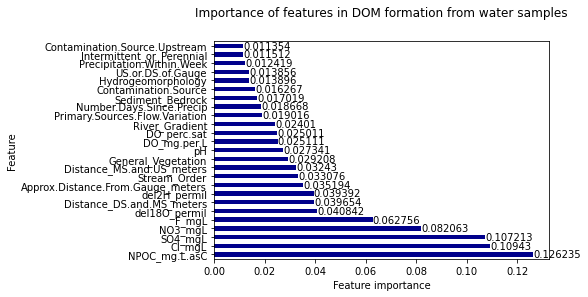

<Figure size 432x288 with 0 Axes>

distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


In [24]:
import matplotlib.pyplot as plt
import numpy as np

FI = (
    pd.Series(rf_fitted.feature_importances_, index=X_train.columns)
    .nlargest(25)
    .plot(kind="barh", color="darkblue")
)

plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Importance of features in DOM formation from water samples", pad=25)

# bar labelling guide https://stackoverflow.com/questions/52182746/matplotlib-horizontal-bar-plot-add-values-to-bars
for i, v in enumerate(imp):
    plt.text(v + 0.0001, i, str(round(v, 6)), color="black", va="center")

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("feat_water.pdf", dpi=500, bbox_inches='tight')

In [ ]:
cluster.shutdown() 

In [1]:
from sklearn.cluster import KMeans

In [1]:
import shap 

In [3]:
from xgboost import XGBClassifier